In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pace_neutrons import Matlab
m = Matlab()

# Set SpinW to use mex files:
swp = m.swpref()
swp.usemex = 1

Trying MATLAB version: 2022b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2022b.ctf))
Searching for Matlab 9.13 in /opt/matlab2021b
Searching for Matlab 9.13 in /opt
Trying MATLAB version: 2021b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2021b.ctf))
Searching for Matlab 9.11 in /opt/matlab2021b
Found Matlab 9.11 glnxa64 at /opt/matlab2021b
Interface opened
All features have moved to hor_config


!==================================================================!

All features have moved to hor_config

!==================================================================!
!                           Horace 4.0.0                           !

!------------------------------------------------------------------!
!   Visualisation of multi-dimensional neutron spectroscopy data   !

!                                                                  !
!             Nucl. Inst. Meth. A 8

## SpinW Introduction

SpinW is implemented as a Matlab class. To run a calculation you first have to create an object (instance) of this class:

```
object = m.spinw()
```

then set properties, such as the lattice parameters and atom positions, by calling methods of the class, e.g.:

```
object.genlattice('lat_const',[4,4,4],'angled',[90,90,90],'spgr','P 4')
```

Online documentation is [available here](https://spinw.org/SWclass/).

### Excercise 1: 1D chain

Using `sw_model` ([documentation here](https://spinw.org/sw_model)) set up a model of an antiferromagnetic spin chain with nearest neighbour interaction J=1 meV. (Remember that positive values indicate antiferromagnetic exchange in the convention used by SpinW)

Plot the model – which crystallographic direction is the spin chain along? In which direction in Q would you expect the spin waves to be dispersive?

Use the `spinwave` ([documentation here](https://spinw.org/spinw_spinwave)) method to calculate the spin wave dispersion along the chain, and plot the result.

Use the `sw_egrid` ([documentation here](https://spinw.org/sw_egrid)) function on the calculated spectrum object to create an intensity spectrum and plot it with sw_plotspec with the `'dE'` option.

Now create a ferromagnetic chain using sw_model and calculate and plot its neutron intensity spectrum. (Use the `figure` command to create a new figure before plotting the new spectrum otherwise the old [antiferromagnetic chain] spectrum will be erased and overplotted).

Aside from the difference in the dispersion, what is the difference between the neutron intensity between the ferromagnetic and antiferromagnetic chain? Why do you think this difference arises?

Preparing 'chain' model ...

Creating the bond list (maxDistance = 10 Å, nCell = 4x2x2)...

...9 bonds are retained out of 125 generated!

                                        


 20.00%, remained: 000:00:00 (HH:MM:SS).

 30.00%, remained: 000:00:00 (HH:MM:SS).

 40.00%, remained: 000:00:00 (HH:MM:SS).

 50.00%, remained: 000:00:00 (HH:MM:SS).

 60.00%, remained: 000:00:00 (HH:MM:SS).

 70.00%, remained: 000:00:00 (HH:MM:SS).

 80.00%, remained: 000:00:00 (HH:MM:SS).


100.00%, remained: 000:00:00 (HH:MM:SS).

... ready!

Creating 3D plot... 

...3k faces and 2k vertices are drawn!



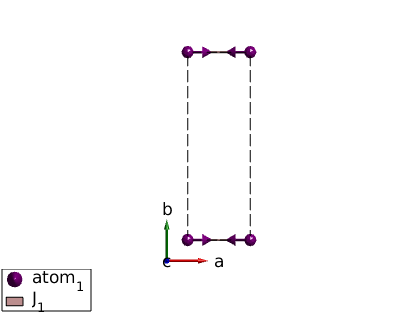

In [2]:
chain = m.sw_model('chain', 1)
m.plot(chain)

Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 500, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



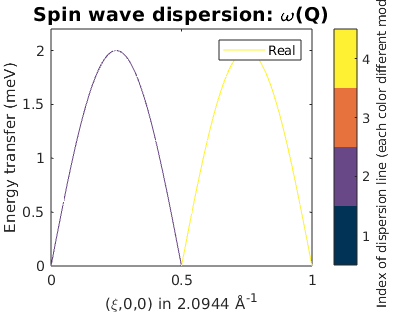

In [3]:
spec = chain.spinwave(([0,0,0], [1,0,0], 500))
m.sw_plotspec(spec)

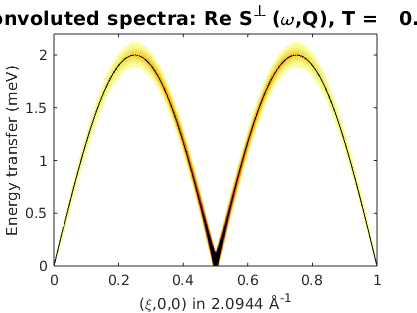

In [4]:
m.sw_plotspec(m.sw_egrid(spec), 'dE', 0.1, 'legend', 0)

Preparing 'chain' model ...

Creating the bond list (maxDistance = 10 Å, nCell = 4x2x2)...

...9 bonds are retained out of 125 generated!

                                        

 10.00%, remained: 000:00:00 (HH:MM:SS).

 20.00%, remained: 000:00:00 (HH:MM:SS).

 30.00%, remained: 000:00:00 (HH:MM:SS).

 40.00%, remained: 000:00:00 (HH:MM:SS).

 50.00%, remained: 000:00:00 (HH:MM:SS).

 60.00%, remained: 000:00:00 (HH:MM:SS).

 70.00%, remained: 000:00:00 (HH:MM:SS).

 80.00%, remained: 000:00:00 (HH:MM:SS).

 90.00%, remained: 000:00:00 (HH:MM:SS).

100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).

... ready!

Calculating COMMENSURATE spin wave spectra (nMagExt = 1, nHkl = 500, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.

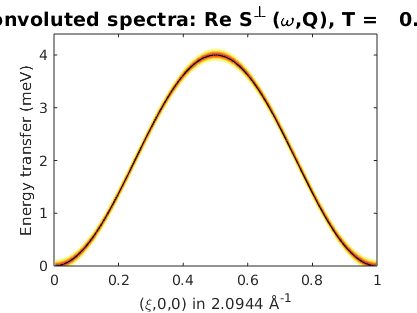

In [5]:
fm_chain = m.sw_model('chain', -1)
m.sw_plotspec(m.sw_egrid(fm_chain.spinwave(([0,0,0], [1,0,0], 500))), 'legend', 0)

Use the `powspec` method ([documentation here](https://spinw.org/spinw_powspec)) to calculate a powder spectrum of the FM chain between 0 and 3 Å$^{-1}$ in 100 steps with 1000 random sampling points per Q bin. What feature of the dispersion correspond to what feature of the powder spectrum?

Repeat the powder spectrum calculation for the AFM chain – what differences do you notice?

Calculating powder spectra...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

Calculation finished.

Calculating powder spectra...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

                                        

Calculation finished.



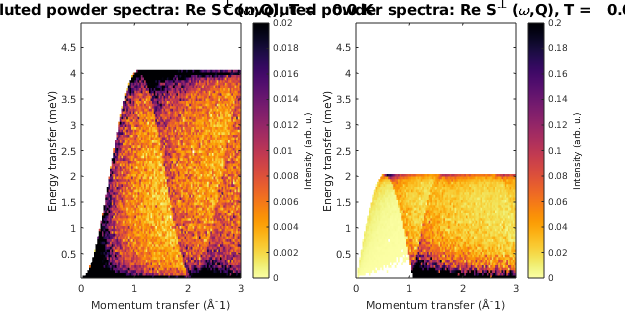

In [6]:
%matlab_fig -w 800 -h 400 -r 75

fm_powspec = fm_chain.powspec(np.linspace(0,3,100), 'Evect', np.linspace(0, 5, 100), 'nRand', 1000)
m.subplot(1,2,1)
m.sw_plotspec(fm_powspec)
afm_powspec = chain.powspec(np.linspace(0,3,100), 'Evect', np.linspace(0, 5, 100), 'nRand', 1000)
m.subplot(1,2,2)
m.sw_plotspec(afm_powspec)

Finally, you can also calculate the magnon density of states (DOS) by randomly sampling in the first Brillouin zone and summing the results over Q

How does the DOS compare to summing the powder spectrum over Q? Why did we use the 'Sxx+Syy+Szz' component instead of the neutron 'Sperp' component which is the default used in powspec?

In [7]:
Qvec = np.random.rand(3, int(1e5))   # Generate 10000 random Q points between [0,1]
dosspec = chain.spinwave(Qvec)  # Calculates the dispersion

# Now take the trace of the Sab correlation matrix instead Sperp
# also make sure we use the same energy vector as for the powder calculation to compare
dosspec = m.sw_egrid(dosspec, 'component', 'Sxx+Syy+Szz', 'Evect', np.linspace(0,3,100))

# Now broaden the spectrum with a Gaussian of width 0.01meV
dosspec = m.sw_instrument(dosspec, 'dE', 0.01)
magnon_dos = sum(dosspec['swConv'], 2)

Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 100000, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.

Finite instrumental energy resolution is applied.



(0.0, 100000.0)

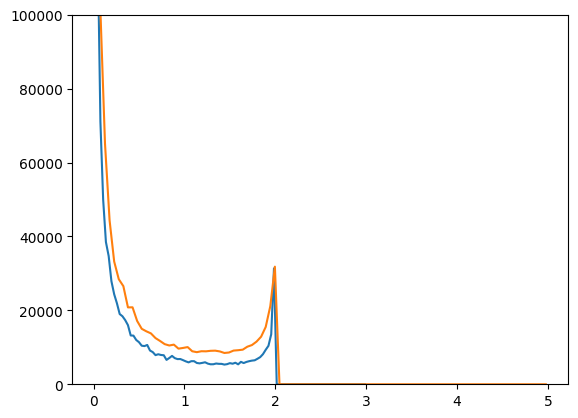

In [8]:
# The energy vector is stored as bin boundaries in the spectrum
en = (dosspec['Evect'][0,:-1] + dosspec['Evect'][0,1:]) / 2
magnon_dos = np.sum(dosspec['swConv'], axis=1)
plt.plot(en, magnon_dos)

# Compare to summing the powder spectrum
enp = (afm_powspec['Evect'][0,:-1] + afm_powspec['Evect'][0,1:]) / 2
powsum = np.sum(afm_powspec['swConv'], axis=1);
plt.plot(enp, powsum / np.max(powsum) * np.max(magnon_dos))
plt.ylim(0, 100000)

Calculating COMMENSURATE spin wave spectra (nMagExt = 1, nHkl = 100000, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.

Finite instrumental energy resolution is applied.



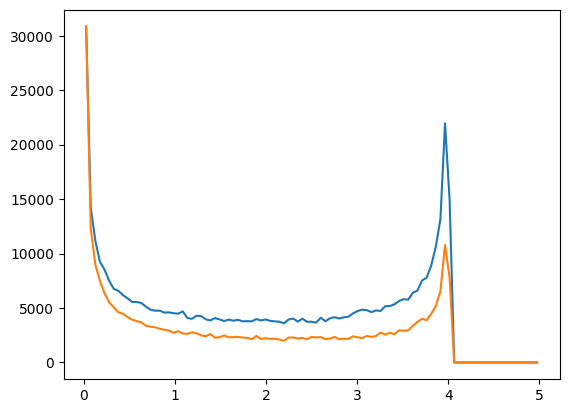

In [9]:
# Calculates the DOS for the FM chain
Qvec = np.random.rand(3, int(1e5))   # Generate 10000 random Q points between [0,1]
dosspec = fm_chain.spinwave(Qvec)     # Calculates the dispersion
# Now take the trace of the Sab correlation matrix instead Sperp
# also make sure we use the same energy vector as for the powder calculation to compare
dosspec = m.sw_egrid(dosspec, 'component', 'Sxx+Syy+Szz', 'Evect', np.linspace(0,5,100))
# Now broaden the spectrum with a Gaussian of width 0.01meV
dosspec = m.sw_instrument(dosspec, 'dE', 0.01)
magnon_dos = np.sum(dosspec['swConv'], axis=1)

# The energy vector is stored as bin boundaries in the spectrum
en = (dosspec['Evect'][0,:-1] + dosspec['Evect'][0,1:]) / 2
plt.plot(en, magnon_dos)

# Compare to summing the powder spectrum
enp = (fm_powspec['Evect'][0,:-1] + fm_powspec['Evect'][0,1:]) / 2
powsum = np.sum(fm_powspec['swConv'], axis=1);
plt.plot(enp, powsum / np.max(powsum) * np.max(magnon_dos))
